In [2]:
import numpy as np
from tqdm import tqdm
import scipy.stats as sp
from scipy.special import gamma
from scipy.optimize import minimize
from scipy.integrate import tplquad 
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'tqdm'

In [24]:
# PARAMETERS OF THE RUN
initial_sample = 0*np.ones(1000)
d = len(initial_sample)
time_step = 1e-3
sampling = 10**3
n_MC = 100
tune_interval = 10**2
number_of_samples = sampling+tune_interval

delta_vector = np.array([1e-6, 1e-5, 2.5e-3])
#delta_vector = np.array([1e-4, 3e-4, 6e-4, 9e-4, 1e-3, 2e-3, 3e-3])
#delta_vector = np.array([2,3,5,10])

In [26]:
#reference value 
EX2 = 31.61232243
EX4 = 1000.318801
EX6 = 31684.37599

In [27]:
# define a potential and its gradient
def potential(x:float) -> float:
    return np.linalg.norm(x)**4/4

def gradient(x:float) -> float:
    return np.linalg.norm(x)**2 * x

def hessian_p(x: float, p:float) -> float:
    return 2 * x * (np.dot(x,p)) + np.linalg.norm(x)**2 * p  # + 1/time_step * p


def comp_moment(samples, power=2):
    norms = np.linalg.norm(samples, axis=1)
    moment = np.mean(norms**power)
    return moment

In [28]:
# IPLA

# Monte Carlo 
implicit_delta_re = []
implicit_delta_cv = []

for delta in delta_vector:

    print("delta = " + str(delta))

    moment = []

    for i_MC in range(0, n_MC):

        print(str(i_MC) + "/" + str(n_MC))

        samples_implicit = [initial_sample]

        for _ in tqdm(range(1, number_of_samples)):

            # inexact proximal step 
            x = minimize(
                lambda x: potential(x) + 1/(2*time_step) * np.linalg.norm(x - samples_implicit[-1])**2, 
                jac=lambda x: gradient(x) + 1/time_step * (x - samples_implicit[-1]),
                hessp=lambda x, p: hessian_p(x,p) + 1/time_step * p,
                x0=samples_implicit[-1], 
                method="Newton-CG", 
                tol=1e-10
                ).x
            
            x+= np.random.choice([-delta, delta], p = [0.5, 0.5])
            
            # adding Gaussian
            x = x + sp.norm.rvs(loc=0, scale=np.sqrt(2*time_step), size=d)
            # save value
            samples_implicit.append(x)

        samples_implicit = np.array(samples_implicit[tune_interval:])

        moment.append(comp_moment(samples_implicit, 2))

    moment = np.array(moment)

    implicit_delta_re.append(np.abs(np.mean(moment)-EX2)/EX2)
    implicit_delta_cv.append(np.std(moment)/np.mean(moment))

implicit_delta_re = np.array(implicit_delta_re)
implicit_delta_cv = np.array(implicit_delta_cv)

print(implicit_delta_re)
print(implicit_delta_cv) 

delta = 1e-06
0/100


100%|██████████| 1099/1099 [00:02<00:00, 380.79it/s]


1/100


100%|██████████| 1099/1099 [00:02<00:00, 375.91it/s]


2/100


100%|██████████| 1099/1099 [00:02<00:00, 404.35it/s]


3/100


100%|██████████| 1099/1099 [00:02<00:00, 390.50it/s]


4/100


100%|██████████| 1099/1099 [00:02<00:00, 394.69it/s]


5/100


100%|██████████| 1099/1099 [00:02<00:00, 396.66it/s]


6/100


100%|██████████| 1099/1099 [00:02<00:00, 415.24it/s]


7/100


100%|██████████| 1099/1099 [00:02<00:00, 421.70it/s]


8/100


100%|██████████| 1099/1099 [00:02<00:00, 392.63it/s]


9/100


100%|██████████| 1099/1099 [00:02<00:00, 389.34it/s]


10/100


100%|██████████| 1099/1099 [00:02<00:00, 407.54it/s]


11/100


100%|██████████| 1099/1099 [00:02<00:00, 410.51it/s]


12/100


100%|██████████| 1099/1099 [00:02<00:00, 408.83it/s]


13/100


100%|██████████| 1099/1099 [00:02<00:00, 405.43it/s]


14/100


100%|██████████| 1099/1099 [00:02<00:00, 410.96it/s]


15/100


100%|██████████| 1099/1099 [00:02<00:00, 409.54it/s]


16/100


100%|██████████| 1099/1099 [00:02<00:00, 414.62it/s]


17/100


100%|██████████| 1099/1099 [00:02<00:00, 422.19it/s]


18/100


100%|██████████| 1099/1099 [00:02<00:00, 406.02it/s]


19/100


100%|██████████| 1099/1099 [00:02<00:00, 400.40it/s]


20/100


100%|██████████| 1099/1099 [00:02<00:00, 421.12it/s]


21/100


100%|██████████| 1099/1099 [00:02<00:00, 413.30it/s]


22/100


100%|██████████| 1099/1099 [00:02<00:00, 420.17it/s]


23/100


100%|██████████| 1099/1099 [00:02<00:00, 405.91it/s]


24/100


100%|██████████| 1099/1099 [00:02<00:00, 390.47it/s]


25/100


100%|██████████| 1099/1099 [00:02<00:00, 408.91it/s]


26/100


100%|██████████| 1099/1099 [00:02<00:00, 406.89it/s]


27/100


100%|██████████| 1099/1099 [00:02<00:00, 399.13it/s]


28/100


100%|██████████| 1099/1099 [00:02<00:00, 407.92it/s]


29/100


100%|██████████| 1099/1099 [00:02<00:00, 405.97it/s]


30/100


100%|██████████| 1099/1099 [00:02<00:00, 420.32it/s]


31/100


100%|██████████| 1099/1099 [00:02<00:00, 419.91it/s]


32/100


100%|██████████| 1099/1099 [00:02<00:00, 416.42it/s]


33/100


100%|██████████| 1099/1099 [00:02<00:00, 415.93it/s]


34/100


100%|██████████| 1099/1099 [00:02<00:00, 404.30it/s]


35/100


100%|██████████| 1099/1099 [00:02<00:00, 407.92it/s]


36/100


100%|██████████| 1099/1099 [00:02<00:00, 417.13it/s]


37/100


100%|██████████| 1099/1099 [00:02<00:00, 392.89it/s]


38/100


100%|██████████| 1099/1099 [00:02<00:00, 425.07it/s]


39/100


100%|██████████| 1099/1099 [00:02<00:00, 403.02it/s]


40/100


100%|██████████| 1099/1099 [00:02<00:00, 401.42it/s]


41/100


100%|██████████| 1099/1099 [00:02<00:00, 389.63it/s]


42/100


100%|██████████| 1099/1099 [00:02<00:00, 394.64it/s]


43/100


100%|██████████| 1099/1099 [00:02<00:00, 385.00it/s]


44/100


100%|██████████| 1099/1099 [00:02<00:00, 405.74it/s]


45/100


100%|██████████| 1099/1099 [00:02<00:00, 398.73it/s]


46/100


100%|██████████| 1099/1099 [00:02<00:00, 436.78it/s]


47/100


100%|██████████| 1099/1099 [00:02<00:00, 380.03it/s]


48/100


100%|██████████| 1099/1099 [00:02<00:00, 389.63it/s]


49/100


100%|██████████| 1099/1099 [00:02<00:00, 410.10it/s]


50/100


100%|██████████| 1099/1099 [00:02<00:00, 416.08it/s]


51/100


100%|██████████| 1099/1099 [00:02<00:00, 404.10it/s]


52/100


100%|██████████| 1099/1099 [00:02<00:00, 400.35it/s]


53/100


100%|██████████| 1099/1099 [00:02<00:00, 404.24it/s]


54/100


100%|██████████| 1099/1099 [00:02<00:00, 425.10it/s]


55/100


100%|██████████| 1099/1099 [00:02<00:00, 423.82it/s]


56/100


100%|██████████| 1099/1099 [00:02<00:00, 400.66it/s]


57/100


100%|██████████| 1099/1099 [00:02<00:00, 395.75it/s]


58/100


100%|██████████| 1099/1099 [00:02<00:00, 420.56it/s]


59/100


100%|██████████| 1099/1099 [00:02<00:00, 402.20it/s]


60/100


100%|██████████| 1099/1099 [00:02<00:00, 402.74it/s]


61/100


100%|██████████| 1099/1099 [00:02<00:00, 405.76it/s]


62/100


100%|██████████| 1099/1099 [00:02<00:00, 406.32it/s]


63/100


100%|██████████| 1099/1099 [00:02<00:00, 404.01it/s]


64/100


100%|██████████| 1099/1099 [00:02<00:00, 409.79it/s]


65/100


100%|██████████| 1099/1099 [00:02<00:00, 415.45it/s]


66/100


100%|██████████| 1099/1099 [00:02<00:00, 402.29it/s]


67/100


100%|██████████| 1099/1099 [00:02<00:00, 404.63it/s]


68/100


100%|██████████| 1099/1099 [00:02<00:00, 382.25it/s]


69/100


100%|██████████| 1099/1099 [00:02<00:00, 389.42it/s]


70/100


100%|██████████| 1099/1099 [00:02<00:00, 413.72it/s]


71/100


100%|██████████| 1099/1099 [00:02<00:00, 387.09it/s]


72/100


100%|██████████| 1099/1099 [00:02<00:00, 431.75it/s]


73/100


100%|██████████| 1099/1099 [00:02<00:00, 401.72it/s]


74/100


100%|██████████| 1099/1099 [00:02<00:00, 403.50it/s]


75/100


100%|██████████| 1099/1099 [00:02<00:00, 434.32it/s]


76/100


100%|██████████| 1099/1099 [00:02<00:00, 394.11it/s]


77/100


100%|██████████| 1099/1099 [00:02<00:00, 392.65it/s]


78/100


100%|██████████| 1099/1099 [00:02<00:00, 400.08it/s]


79/100


100%|██████████| 1099/1099 [00:02<00:00, 412.81it/s]


80/100


100%|██████████| 1099/1099 [00:02<00:00, 397.20it/s]


81/100


100%|██████████| 1099/1099 [00:02<00:00, 424.16it/s]


82/100


100%|██████████| 1099/1099 [00:02<00:00, 403.32it/s]


83/100


100%|██████████| 1099/1099 [00:02<00:00, 414.34it/s]


84/100


100%|██████████| 1099/1099 [00:02<00:00, 397.53it/s]


85/100


100%|██████████| 1099/1099 [00:02<00:00, 397.41it/s]


86/100


100%|██████████| 1099/1099 [00:02<00:00, 393.26it/s]


87/100


100%|██████████| 1099/1099 [00:02<00:00, 388.66it/s]


88/100


100%|██████████| 1099/1099 [00:02<00:00, 403.25it/s]


89/100


100%|██████████| 1099/1099 [00:02<00:00, 418.17it/s]


90/100


100%|██████████| 1099/1099 [00:02<00:00, 426.50it/s]


91/100


100%|██████████| 1099/1099 [00:02<00:00, 395.71it/s]


92/100


100%|██████████| 1099/1099 [00:02<00:00, 403.97it/s]


93/100


100%|██████████| 1099/1099 [00:02<00:00, 426.93it/s]


94/100


100%|██████████| 1099/1099 [00:02<00:00, 382.31it/s]


95/100


100%|██████████| 1099/1099 [00:02<00:00, 431.16it/s]


96/100


100%|██████████| 1099/1099 [00:02<00:00, 399.09it/s]


97/100


100%|██████████| 1099/1099 [00:02<00:00, 394.56it/s]


98/100


100%|██████████| 1099/1099 [00:02<00:00, 403.04it/s]


99/100


100%|██████████| 1099/1099 [00:02<00:00, 414.26it/s]


delta = 1e-05
0/100


100%|██████████| 1099/1099 [00:02<00:00, 434.96it/s]


1/100


100%|██████████| 1099/1099 [00:02<00:00, 410.97it/s]


2/100


100%|██████████| 1099/1099 [00:02<00:00, 410.24it/s]


3/100


100%|██████████| 1099/1099 [00:02<00:00, 402.36it/s]


4/100


100%|██████████| 1099/1099 [00:02<00:00, 413.00it/s]


5/100


100%|██████████| 1099/1099 [00:02<00:00, 402.27it/s]


6/100


100%|██████████| 1099/1099 [00:02<00:00, 397.09it/s]


7/100


100%|██████████| 1099/1099 [00:02<00:00, 401.35it/s]


8/100


100%|██████████| 1099/1099 [00:02<00:00, 414.40it/s]


9/100


100%|██████████| 1099/1099 [00:02<00:00, 414.11it/s]


10/100


100%|██████████| 1099/1099 [00:02<00:00, 406.92it/s]


11/100


100%|██████████| 1099/1099 [00:02<00:00, 405.81it/s]


12/100


100%|██████████| 1099/1099 [00:02<00:00, 414.33it/s]


13/100


100%|██████████| 1099/1099 [00:02<00:00, 413.58it/s]


14/100


100%|██████████| 1099/1099 [00:02<00:00, 397.51it/s]


15/100


100%|██████████| 1099/1099 [00:02<00:00, 390.94it/s]


16/100


100%|██████████| 1099/1099 [00:02<00:00, 411.09it/s]


17/100


100%|██████████| 1099/1099 [00:02<00:00, 414.16it/s]


18/100


100%|██████████| 1099/1099 [00:02<00:00, 401.81it/s]


19/100


100%|██████████| 1099/1099 [00:02<00:00, 421.69it/s]


20/100


100%|██████████| 1099/1099 [00:02<00:00, 401.15it/s]


21/100


100%|██████████| 1099/1099 [00:02<00:00, 412.33it/s]


22/100


100%|██████████| 1099/1099 [00:02<00:00, 394.02it/s]


23/100


100%|██████████| 1099/1099 [00:02<00:00, 400.63it/s]


24/100


100%|██████████| 1099/1099 [00:02<00:00, 394.82it/s]


25/100


100%|██████████| 1099/1099 [00:02<00:00, 374.54it/s]


26/100


100%|██████████| 1099/1099 [00:02<00:00, 416.84it/s]


27/100


100%|██████████| 1099/1099 [00:02<00:00, 422.34it/s]


28/100


100%|██████████| 1099/1099 [00:02<00:00, 410.18it/s]


29/100


100%|██████████| 1099/1099 [00:02<00:00, 415.31it/s]


30/100


100%|██████████| 1099/1099 [00:02<00:00, 392.40it/s]


31/100


100%|██████████| 1099/1099 [00:02<00:00, 415.70it/s]


32/100


100%|██████████| 1099/1099 [00:02<00:00, 406.02it/s]


33/100


100%|██████████| 1099/1099 [00:02<00:00, 398.81it/s]


34/100


100%|██████████| 1099/1099 [00:02<00:00, 402.07it/s]


35/100


100%|██████████| 1099/1099 [00:02<00:00, 418.86it/s]


36/100


100%|██████████| 1099/1099 [00:02<00:00, 409.32it/s]


37/100


100%|██████████| 1099/1099 [00:02<00:00, 393.44it/s]


38/100


100%|██████████| 1099/1099 [00:02<00:00, 400.12it/s]


39/100


100%|██████████| 1099/1099 [00:02<00:00, 395.63it/s]


40/100


100%|██████████| 1099/1099 [00:02<00:00, 416.79it/s]


41/100


100%|██████████| 1099/1099 [00:02<00:00, 403.50it/s]


42/100


100%|██████████| 1099/1099 [00:02<00:00, 406.04it/s]


43/100


100%|██████████| 1099/1099 [00:02<00:00, 423.94it/s]


44/100


100%|██████████| 1099/1099 [00:02<00:00, 435.06it/s]


45/100


100%|██████████| 1099/1099 [00:02<00:00, 401.86it/s]


46/100


100%|██████████| 1099/1099 [00:02<00:00, 392.44it/s]


47/100


100%|██████████| 1099/1099 [00:02<00:00, 394.56it/s]


48/100


100%|██████████| 1099/1099 [00:02<00:00, 407.13it/s]


49/100


100%|██████████| 1099/1099 [00:02<00:00, 411.23it/s]


50/100


100%|██████████| 1099/1099 [00:02<00:00, 392.59it/s]


51/100


100%|██████████| 1099/1099 [00:02<00:00, 414.32it/s]


52/100


100%|██████████| 1099/1099 [00:02<00:00, 406.05it/s]


53/100


100%|██████████| 1099/1099 [00:02<00:00, 410.87it/s]


54/100


100%|██████████| 1099/1099 [00:02<00:00, 382.03it/s]


55/100


100%|██████████| 1099/1099 [00:02<00:00, 399.39it/s]


56/100


100%|██████████| 1099/1099 [00:02<00:00, 398.59it/s]


57/100


100%|██████████| 1099/1099 [00:02<00:00, 385.46it/s]


58/100


100%|██████████| 1099/1099 [00:02<00:00, 412.25it/s]


59/100


100%|██████████| 1099/1099 [00:02<00:00, 386.55it/s]


60/100


100%|██████████| 1099/1099 [00:02<00:00, 407.40it/s]


61/100


100%|██████████| 1099/1099 [00:02<00:00, 394.31it/s]


62/100


100%|██████████| 1099/1099 [00:02<00:00, 385.75it/s]


63/100


100%|██████████| 1099/1099 [00:02<00:00, 400.87it/s]


64/100


100%|██████████| 1099/1099 [00:02<00:00, 403.41it/s]


65/100


100%|██████████| 1099/1099 [00:02<00:00, 390.48it/s]


66/100


100%|██████████| 1099/1099 [00:02<00:00, 417.02it/s]


67/100


100%|██████████| 1099/1099 [00:02<00:00, 415.41it/s]


68/100


100%|██████████| 1099/1099 [00:02<00:00, 394.54it/s]


69/100


100%|██████████| 1099/1099 [00:02<00:00, 397.80it/s]


70/100


100%|██████████| 1099/1099 [00:02<00:00, 391.39it/s]


71/100


100%|██████████| 1099/1099 [00:02<00:00, 393.81it/s]


72/100


100%|██████████| 1099/1099 [00:02<00:00, 425.67it/s]


73/100


100%|██████████| 1099/1099 [00:02<00:00, 425.66it/s]


74/100


100%|██████████| 1099/1099 [00:02<00:00, 415.24it/s]


75/100


100%|██████████| 1099/1099 [00:02<00:00, 418.27it/s]


76/100


100%|██████████| 1099/1099 [00:02<00:00, 413.66it/s]


77/100


100%|██████████| 1099/1099 [00:02<00:00, 436.36it/s]


78/100


100%|██████████| 1099/1099 [00:02<00:00, 390.04it/s]


79/100


100%|██████████| 1099/1099 [00:02<00:00, 397.40it/s]


80/100


100%|██████████| 1099/1099 [00:02<00:00, 412.26it/s]


81/100


100%|██████████| 1099/1099 [00:02<00:00, 412.30it/s]


82/100


100%|██████████| 1099/1099 [00:02<00:00, 410.03it/s]


83/100


100%|██████████| 1099/1099 [00:02<00:00, 404.51it/s]


84/100


100%|██████████| 1099/1099 [00:02<00:00, 394.36it/s]


85/100


100%|██████████| 1099/1099 [00:02<00:00, 440.10it/s]


86/100


100%|██████████| 1099/1099 [00:02<00:00, 386.15it/s]


87/100


100%|██████████| 1099/1099 [00:02<00:00, 402.46it/s]


88/100


100%|██████████| 1099/1099 [00:02<00:00, 390.43it/s]


89/100


100%|██████████| 1099/1099 [00:02<00:00, 403.29it/s]


90/100


100%|██████████| 1099/1099 [00:02<00:00, 412.47it/s]


91/100


100%|██████████| 1099/1099 [00:02<00:00, 394.41it/s]


92/100


100%|██████████| 1099/1099 [00:02<00:00, 390.42it/s]


93/100


100%|██████████| 1099/1099 [00:02<00:00, 412.80it/s]


94/100


100%|██████████| 1099/1099 [00:02<00:00, 394.59it/s]


95/100


100%|██████████| 1099/1099 [00:02<00:00, 405.83it/s]


96/100


100%|██████████| 1099/1099 [00:02<00:00, 385.91it/s]


97/100


100%|██████████| 1099/1099 [00:02<00:00, 375.66it/s]


98/100


100%|██████████| 1099/1099 [00:02<00:00, 405.66it/s]


99/100


100%|██████████| 1099/1099 [00:02<00:00, 403.08it/s]


delta = 0.0025
0/100


100%|██████████| 1099/1099 [00:02<00:00, 418.94it/s]


1/100


100%|██████████| 1099/1099 [00:02<00:00, 398.72it/s]


2/100


100%|██████████| 1099/1099 [00:02<00:00, 417.48it/s]


3/100


100%|██████████| 1099/1099 [00:02<00:00, 384.14it/s]


4/100


100%|██████████| 1099/1099 [00:02<00:00, 403.66it/s]


5/100


100%|██████████| 1099/1099 [00:02<00:00, 401.19it/s]


6/100


100%|██████████| 1099/1099 [00:02<00:00, 419.56it/s]


7/100


100%|██████████| 1099/1099 [00:02<00:00, 390.87it/s]


8/100


100%|██████████| 1099/1099 [00:02<00:00, 397.81it/s]


9/100


100%|██████████| 1099/1099 [00:02<00:00, 391.35it/s]


10/100


100%|██████████| 1099/1099 [00:02<00:00, 373.39it/s]


11/100


100%|██████████| 1099/1099 [00:02<00:00, 396.34it/s]


12/100


100%|██████████| 1099/1099 [00:02<00:00, 380.66it/s]


13/100


100%|██████████| 1099/1099 [00:02<00:00, 408.42it/s]


14/100


100%|██████████| 1099/1099 [00:02<00:00, 401.32it/s]


15/100


100%|██████████| 1099/1099 [00:02<00:00, 409.61it/s]


16/100


100%|██████████| 1099/1099 [00:02<00:00, 417.31it/s]


17/100


100%|██████████| 1099/1099 [00:02<00:00, 410.27it/s]


18/100


100%|██████████| 1099/1099 [00:02<00:00, 417.41it/s]


19/100


100%|██████████| 1099/1099 [00:02<00:00, 401.46it/s]


20/100


100%|██████████| 1099/1099 [00:02<00:00, 397.40it/s]


21/100


100%|██████████| 1099/1099 [00:02<00:00, 393.25it/s]


22/100


100%|██████████| 1099/1099 [00:02<00:00, 377.36it/s]


23/100


100%|██████████| 1099/1099 [00:02<00:00, 408.90it/s]


24/100


100%|██████████| 1099/1099 [00:02<00:00, 397.64it/s]


25/100


100%|██████████| 1099/1099 [00:02<00:00, 394.44it/s]


26/100


100%|██████████| 1099/1099 [00:02<00:00, 399.20it/s]


27/100


100%|██████████| 1099/1099 [00:02<00:00, 390.42it/s]


28/100


100%|██████████| 1099/1099 [00:02<00:00, 393.00it/s]


29/100


100%|██████████| 1099/1099 [00:02<00:00, 413.26it/s]


30/100


100%|██████████| 1099/1099 [00:02<00:00, 396.99it/s]


31/100


100%|██████████| 1099/1099 [00:02<00:00, 388.73it/s]


32/100


100%|██████████| 1099/1099 [00:02<00:00, 412.81it/s]


33/100


100%|██████████| 1099/1099 [00:02<00:00, 404.52it/s]


34/100


100%|██████████| 1099/1099 [00:02<00:00, 387.96it/s]


35/100


100%|██████████| 1099/1099 [00:02<00:00, 395.15it/s]


36/100


100%|██████████| 1099/1099 [00:02<00:00, 411.81it/s]


37/100


100%|██████████| 1099/1099 [00:02<00:00, 398.94it/s]


38/100


100%|██████████| 1099/1099 [00:02<00:00, 417.38it/s]


39/100


100%|██████████| 1099/1099 [00:02<00:00, 411.07it/s]


40/100


100%|██████████| 1099/1099 [00:02<00:00, 417.50it/s]


41/100


100%|██████████| 1099/1099 [00:02<00:00, 412.73it/s]


42/100


100%|██████████| 1099/1099 [00:02<00:00, 419.63it/s]


43/100


100%|██████████| 1099/1099 [00:02<00:00, 409.43it/s]


44/100


100%|██████████| 1099/1099 [00:02<00:00, 372.55it/s]


45/100


100%|██████████| 1099/1099 [00:02<00:00, 408.32it/s]


46/100


100%|██████████| 1099/1099 [00:02<00:00, 405.09it/s]


47/100


100%|██████████| 1099/1099 [00:02<00:00, 397.46it/s]


48/100


100%|██████████| 1099/1099 [00:02<00:00, 407.76it/s]


49/100


100%|██████████| 1099/1099 [00:02<00:00, 411.59it/s]


50/100


100%|██████████| 1099/1099 [00:02<00:00, 408.21it/s]


51/100


100%|██████████| 1099/1099 [00:02<00:00, 396.26it/s]


52/100


100%|██████████| 1099/1099 [00:02<00:00, 402.69it/s]


53/100


100%|██████████| 1099/1099 [00:02<00:00, 409.40it/s]


54/100


100%|██████████| 1099/1099 [00:02<00:00, 404.52it/s]


55/100


100%|██████████| 1099/1099 [00:02<00:00, 398.57it/s]


56/100


100%|██████████| 1099/1099 [00:02<00:00, 409.32it/s]


57/100


100%|██████████| 1099/1099 [00:02<00:00, 401.77it/s]


58/100


100%|██████████| 1099/1099 [00:02<00:00, 387.38it/s]


59/100


100%|██████████| 1099/1099 [00:02<00:00, 394.06it/s]


60/100


100%|██████████| 1099/1099 [00:02<00:00, 416.42it/s]


61/100


100%|██████████| 1099/1099 [00:02<00:00, 391.85it/s]


62/100


100%|██████████| 1099/1099 [00:02<00:00, 395.20it/s]


63/100


100%|██████████| 1099/1099 [00:02<00:00, 406.15it/s]


64/100


100%|██████████| 1099/1099 [00:02<00:00, 397.57it/s]


65/100


100%|██████████| 1099/1099 [00:02<00:00, 416.95it/s]


66/100


100%|██████████| 1099/1099 [00:02<00:00, 406.23it/s]


67/100


100%|██████████| 1099/1099 [00:02<00:00, 396.75it/s]


68/100


100%|██████████| 1099/1099 [00:02<00:00, 400.34it/s]


69/100


100%|██████████| 1099/1099 [00:02<00:00, 423.17it/s]


70/100


100%|██████████| 1099/1099 [00:02<00:00, 427.11it/s]


71/100


100%|██████████| 1099/1099 [00:02<00:00, 422.19it/s]


72/100


100%|██████████| 1099/1099 [00:02<00:00, 393.97it/s]


73/100


100%|██████████| 1099/1099 [00:02<00:00, 407.45it/s]


74/100


100%|██████████| 1099/1099 [00:02<00:00, 398.26it/s]


75/100


100%|██████████| 1099/1099 [00:02<00:00, 403.70it/s]


76/100


100%|██████████| 1099/1099 [00:02<00:00, 421.01it/s]


77/100


100%|██████████| 1099/1099 [00:02<00:00, 405.18it/s]


78/100


100%|██████████| 1099/1099 [00:02<00:00, 397.60it/s]


79/100


100%|██████████| 1099/1099 [00:02<00:00, 393.28it/s]


80/100


100%|██████████| 1099/1099 [00:02<00:00, 401.07it/s]


81/100


100%|██████████| 1099/1099 [00:02<00:00, 419.75it/s]


82/100


100%|██████████| 1099/1099 [00:02<00:00, 389.98it/s]


83/100


100%|██████████| 1099/1099 [00:02<00:00, 391.78it/s]


84/100


100%|██████████| 1099/1099 [00:02<00:00, 422.26it/s]


85/100


100%|██████████| 1099/1099 [00:02<00:00, 402.27it/s]


86/100


100%|██████████| 1099/1099 [00:02<00:00, 405.26it/s]


87/100


100%|██████████| 1099/1099 [00:02<00:00, 391.74it/s]


88/100


100%|██████████| 1099/1099 [00:02<00:00, 417.40it/s]


89/100


100%|██████████| 1099/1099 [00:02<00:00, 391.22it/s]


90/100


100%|██████████| 1099/1099 [00:02<00:00, 403.94it/s]


91/100


100%|██████████| 1099/1099 [00:02<00:00, 408.99it/s]


92/100


100%|██████████| 1099/1099 [00:02<00:00, 407.97it/s]


93/100


100%|██████████| 1099/1099 [00:02<00:00, 395.11it/s]


94/100


100%|██████████| 1099/1099 [00:02<00:00, 408.65it/s]


95/100


100%|██████████| 1099/1099 [00:02<00:00, 401.41it/s]


96/100


100%|██████████| 1099/1099 [00:02<00:00, 418.56it/s]


97/100


100%|██████████| 1099/1099 [00:02<00:00, 415.57it/s]


98/100


100%|██████████| 1099/1099 [00:02<00:00, 394.31it/s]


99/100


100%|██████████| 1099/1099 [00:02<00:00, 413.44it/s]

[0.05562239 0.05631552 0.05787508]
[0.00421622 0.00426765 0.00436956]


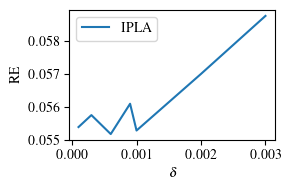

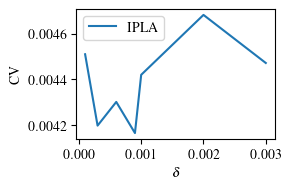

In [21]:
plt.rcParams.update({
    "font.family": "serif",   # specify font family here
    "font.serif": ["Times"],  # specify font here
    "text.usetex": True,
    } 
    )

plt.figure(figsize=(3,2))
plt.plot(delta_vector, implicit_delta_re, color="C0", label="IPLA")
plt.legend()
plt.xlabel("$\\delta$")
plt.ylabel("RE")
plt.tight_layout()
plt.savefig("approximation_minim_re.pdf")

plt.figure(figsize=(3,2))
plt.plot(delta_vector, implicit_delta_cv, color="C0", label="IPLA")
plt.legend()
plt.xlabel("$\\delta$")
plt.ylabel("CV")
plt.tight_layout()
plt.savefig("approximation_minim_cv.pdf")

In [ ]:
np.save("re_apprx.npy", implicit_delta_re)
np.save("cv_apprx.npy", implicit_delta_cv)

In [29]:
print(delta_vector)
print(implicit_delta_re)
print(implicit_delta_cv)

[1.0e-06 1.0e-05 2.5e-03]
[0.05562239 0.05631552 0.05787508]
[0.00421622 0.00426765 0.00436956]


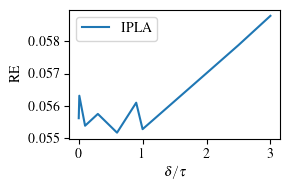

In [43]:
# delta_vector = [1.e-06, 2.e-01, 4.e-01, 6.e-01, 8.e-01, 1.e+00, 2 , 3,  5, 10]
# implicit_delta_re = [ 0.13341709, 13.95209423 ,31.52236114 ,51.31746086 ,71.63632308 ,97.69770428 ,260.32171033,  484.62794769, 1116.34652613, 3845.73140888]

delta_vector = np.array([1.0e-06, 1.0e-05, 0.0001, 0.0003, 0.0006, 0.0009, 0.001,  0.002,  2.5e-03, 0.003 ])
implicit_delta_re = np.array([0.05562239, 0.05631552, 0.05539012, 0.0557545,  0.05517661, 0.05610063, 0.05528463, 0.05700998, 0.05787508, 0.058778])


plt.rcParams.update({
    "font.family": "serif",   # specify font family here
    "font.serif": ["Times"],  # specify font here
    "text.usetex": True,
    } 
    )

plt.figure(figsize=(3,2))
plt.plot(delta_vector/time_step, implicit_delta_re, color="C0", label="IPLA")
plt.legend()
plt.xlabel("$\\delta/\\tau$")
plt.ylabel("RE")
plt.tight_layout()
plt.savefig("approximation_minim_re.pdf")

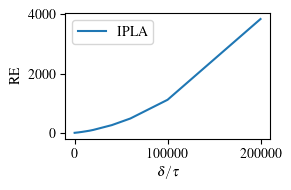

In [45]:
delta_vector = np.array([1.e-06, 2.e-01, 4.e-01, 6.e-01, 8.e-01, 1.e+00, 2 , 3,  5, 10])
implicit_delta_re = np.array([ 0.13341709, 13.95209423 ,31.52236114 ,51.31746086 ,71.63632308 ,97.69770428 ,260.32171033,  484.62794769, 1116.34652613, 3845.73140888])

time_step = 5e-5

plt.rcParams.update({
    "font.family": "serif",   # specify font family here
    "font.serif": ["Times"],  # specify font here
    "text.usetex": True,
    } 
    )

plt.figure(figsize=(3,2))
plt.plot(delta_vector/time_step, implicit_delta_re, color="C0", label="IPLA")
plt.legend()
plt.xlabel("$\\delta/\\tau$")
plt.ylabel("RE")
plt.tight_layout()
plt.savefig("approximation_minim_re.pdf")